# Análisis de calidad de servicio eléctrico
## Aplicación de ML sobre datos georeferenciados

## Mentoría: Diplomatura Ciencias de Datos, FAMAF, 2020

### Práctico 2: Exploración y curación de los datos 

Mentor: 

* Ramiro Caro

Integrantes: 

* Smrekar Sacha
* Rubio Ariel
* Ruderman Andrés

## Introduccion y carga de datos


A partir de este punto, utilizaremos los transformadores de distribucion como elemento de análisis, e incorporaremos datos de consumidores, subestación y líneas de distribución.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString
import contextily as ctx
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Editar con el path correspondiente a sus datos
data_path = './data/SULGIPE_46_2018-12-31_M10_20190611-1750.gdb'

In [3]:
untrd = gpd.read_file(data_path, driver='FileGDB', layer='UNTRD')
untrd.shape, untrd.columns

((10508, 33),
 Index(['COD_ID', 'DIST', 'PAC_1', 'PAC_2', 'PAC_3', 'FAS_CON_P', 'FAS_CON_S',
        'FAS_CON_T', 'SIT_ATIV', 'TIP_UNID', 'POS', 'ATRB_PER', 'TEN_LIN_SE',
        'CAP_ELO', 'CAP_CHA', 'TAP', 'CONF', 'POSTO', 'POT_NOM', 'PER_FER',
        'PER_TOT', 'DAT_CON', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ', 'MUN', 'BANC',
        'TIP_TRAFO', 'MRT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [4]:
untrs = gpd.read_file(data_path, driver='FileGDB', layer='UNTRS')
untrs.shape, untrs.columns

((17, 53),
 Index(['COD_ID', 'SUB', 'BARR_1', 'BARR_2', 'BARR_3', 'PAC_1', 'PAC_2',
        'PAC_3', 'DIST', 'FAS_CON_P', 'FAS_CON_S', 'FAS_CON_T', 'SIT_ATIV',
        'TIP_UNID', 'POS', 'POT_NOM', 'POT_F01', 'POT_F02', 'PER_FER',
        'PER_TOT', 'BANC', 'DAT_CON', 'CONJ', 'MUN', 'TIP_TRAFO', 'ALOC_PERD',
        'ENES_01', 'ENES_02', 'ENES_03', 'ENES_04', 'ENES_05', 'ENES_06',
        'ENES_07', 'ENES_08', 'ENES_09', 'ENES_10', 'ENES_11', 'ENES_12',
        'ENET_01', 'ENET_02', 'ENET_03', 'ENET_04', 'ENET_05', 'ENET_06',
        'ENET_07', 'ENET_08', 'ENET_09', 'ENET_10', 'ENET_11', 'ENET_12',
        'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [5]:
ssmt = gpd.read_file(data_path, driver='FileGDB', layer='SSDMT')
ssmt.shape, ssmt.columns

((82760, 24),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

In [6]:
segcon = gpd.read_file(data_path, driver='FileGDB', layer='SEGCON')
segcon.shape, segcon.columns

((82, 40),
 Index(['COD_ID', 'DIST', 'GEOM_CAB', 'FORM_CAB', 'MAT_FAS_1', 'MAT_FAS_2',
        'MAT_FAS_3', 'MAT_NEU', 'ISO_FAS_1', 'ISO_FAS_2', 'ISO_FAS_3',
        'ISO_NEU', 'CND_FAS', 'R1', 'X1', 'FTRCNV', 'CNOM', 'CMAX', 'CM_FAS',
        'TUC_FAS', 'A1_FAS', 'A2_FAS', 'A3_FAS', 'A4_FAS', 'A5_FAS', 'A6_FAS',
        'CM_NEU', 'TUC_NEU', 'A1_NEU', 'A2_NEU', 'A3_NEU', 'A4_NEU', 'A5_NEU',
        'A6_NEU', 'DESCR', 'BIT_FAS_1', 'BIT_FAS_2', 'BIT_FAS_3', 'BIT_NEU',
        'geometry'],
       dtype='object'))

In [7]:
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')
ucbt.shape, ucbt.columns

((148801, 40),
 Index(['DIST', 'PAC', 'PN_CON', 'UNI_TR_D', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'MUN', 'BRR', 'CEP', 'CLAS_SUB', 'CNAE', 'TIP_CC', 'FAS_CON', 'GRU_TEN',
        'TEN_FORN', 'GRU_TAR', 'SIT_ATIV', 'DAT_CON', 'CAR_INST', 'LIV',
        'ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07',
        'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12', 'DIC', 'FIC',
        'SEMRED', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

## Informacion sobre consumindores

1 - En base a los resultados obtenidos en el practico 1. Defina que informacion sobre consumidores, es la mas relevante para la estimacion de calidad de servicio.

2 - Realize el tratamiento de las filas con valores inválidos y outliers, y luego agrupe los datos en base a la variable UNI_TF_D.

3 - Justifique los métodos utilizados para agrupar las variables numéricas y categóricas.

Como variable de salida decidimos utilizar FIC, la frecuencia de corte. Esta decisión fue tomada debido a que en principio una mayor frecuencia de corte puede provicar un mayor perjuicio económico al dañar electrodomésticos y equipamiento. Por otro lado a mayor frecuencia de corte más horas de corte, o sea que las variables están correlacionadas. También son relevantes las variables de consumo ENE_XX. SIT_ATIV es el estado de la conexión y la conservamos como variable categórica. ARE_LOC es la ubicación urbana o rural por lo que la conservamos. GRU_TAR son los grupos tarifarios y la conservamos. FAS_CON no sabemos pero la conservamos por las dudas. CNAE es el código de actividad comercial y la conservamos. CLAS_SUB es la clase y sub clase tarifaria y la conservamos. MUN es el municipio del cliente y las conservamos.

Reemplazamos todos los valores negativos en los consumos por 0:

In [8]:
ENE = ['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']

ucbt_pos = ucbt

num = ucbt_pos[ENE]._get_numeric_data()
num[num < 0] = 0
ucbt_pos[ENE] = num

Eliminamos outliers que estén a más de 2,5 sigmas de la media:

In [9]:
for nene in ENE:
    outliers = (np.abs(ucbt_pos[nene] - ucbt_pos[nene].mean()) <= (2.5 * ucbt_pos[nene].std()))
    ucbt_pos = ucbt_pos[outliers]

Definimos las columnas y los datos:

In [10]:
group = ucbt_pos.groupby(['UNI_TR_D'])
inter = ENE+['FIC']
mean = group[inter].mean()
std = group[inter].std()
qua25 = group[inter].quantile(.25)
qua50 = group[inter].quantile(.50)
qua75 = group[inter].quantile(.75)
gmin = group[inter].min()
gmax = group[inter].max()

In [11]:
for ne in inter:
    mean = mean.rename(columns={ne:ne+'_media'})
    std = std.rename(columns={ne:ne+'_std'})
    qua25 = qua25.rename(columns={ne:ne+'_qua25'})
    qua50 = qua50.rename(columns={ne:ne+'_qua50'})
    qua75 = qua75.rename(columns={ne:ne+'_qua75'})
    gmin = gmin.rename(columns={ne:ne+'_min'})
    gmax = gmax.rename(columns={ne:ne+'_max'})

Renombramos la columna "COD_ID" a "UNI_TR_D", para que ambos dataframes tengan la misma columna clave, y luego utilizamos merge para unir ambos dataframes, utilizando de referencia la columna "UNI_TR_D".

In [12]:
#Se puede hacer mejor, pero estamos cansados

untrd = untrd.rename(columns={'COD_ID':'UNI_TR_D'})

untrd = pd.merge(untrd, mean, on='UNI_TR_D', how = 'outer')
untrd = pd.merge(untrd, std, on='UNI_TR_D', how = 'outer')
untrd = pd.merge(untrd, qua25, on='UNI_TR_D', how = 'outer')
untrd = pd.merge(untrd, qua50, on='UNI_TR_D', how = 'outer')
untrd = pd.merge(untrd, qua75, on='UNI_TR_D', how = 'outer')
untrd = pd.merge(untrd, gmin, on='UNI_TR_D', how = 'outer')
untrd = pd.merge(untrd, gmax, on='UNI_TR_D', how = 'outer')

In [13]:
untrd.shape

(10508, 124)

Agregamos para cada untrd el valor más repetido (entre los clientes) de cada variable categórica seleccionada

In [14]:
categorias = ['ARE_LOC', 'GRU_TAR', 'CLAS_SUB', 'CNAE']
aver=[]

for cat in categorias:
    variable = group[cat].agg(pd.Series.mode).to_frame()
    variable = variable.rename(columns={cat:cat+'_moda'})
    aver.append(variable)
    untrd = pd.merge(untrd, variable, on='UNI_TR_D', how = 'outer')

untrd = untrd.rename(columns={'UNI_TR_D':'COD_ID'})

In [15]:
untrd.describe(include='O').T

,count,unique,top,freq
COD_ID,10508,10508,11_1111316,1
PAC_1,10508,10508,232551,1
PAC_2,10508,10508,ET11_1110861,1
PAC_3,10508,6758,0,3751
FAS_CON_P,10508,4,AB,6727
FAS_CON_S,10508,3,AN,6757
FAS_CON_T,10508,2,BN,6757
SIT_ATIV,10508,2,AT,10243
TIP_UNID,10508,1,38,10508
POS,10508,3,PD,10054


In [16]:
untrd.shape

(10508, 128)

## Informacion sobre subestacion

4 - Analise la informacion disponible sobre los transformadores de segmentacion (UNI_TR_S > UNTRS)

5 - Seleccione las variables relevantes, realize tratamiento de valores invalidos y outliers correspondientes. Agrupe los valores por UNTRD y agregue al dataset.

In [17]:
untrs.describe().T

,count,mean,std,min,25%,50%,75%,max
DIST,17.0,4.600000e+01,0.000000e+00,46.00,46.00,46.00,46.00,46.00
POT_NOM,17.0,6.764706e+00,3.509441e+00,5.00,5.00,5.00,5.00,15.00
POT_F01,17.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
POT_F02,17.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
PER_FER,17.0,1.317647e-01,8.240413e-02,0.10,0.10,0.10,0.10,0.35
PER_TOT,17.0,6.088235e-01,1.759575e-01,0.53,0.53,0.53,0.53,1.06
BANC,17.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
CONJ,17.0,1.408453e+04,1.473629e+03,12730.00,12737.00,12743.00,15601.00,15602.00
ENES_01,17.0,1.397955e+07,4.635029e+06,10410053.00,11601402.00,12908106.00,13520222.00,25892236.00
ENES_02,17.0,1.426265e+07,4.650536e+06,10675065.00,11658176.00,13400448.00,13885480.00,26171614.00


Podemos ver que muchas variables numéricas de untrs tienen un valor constante igual a 0. Por esto, seleccionamos solo las variables relevantes del dataset:


In [18]:
ENES = ['ENES_01', 'ENES_02', 'ENES_03', 'ENES_04', 'ENES_05', 'ENES_06',
        'ENES_07', 'ENES_08', 'ENES_09', 'ENES_10', 'ENES_11', 'ENES_12']

interesting = ['COD_ID'] + ENES

Agregamos las dichas variables relevantes de "untrs" a "untrd":

In [19]:
untrs_untrd = untrs[interesting]

untrs_untrd = untrs_untrd.rename(columns={'COD_ID':'UNI_TR_S'})

untrd = pd.merge(untrd, untrs_untrd, on='UNI_TR_S')

In [20]:
untrd.shape

(10504, 140)

## Generacion de variables en base a puntos de referencia

5 - Calcule la distancia euclideana de cada untrd al correspondiente untrs y adicione al dataset.

6 - Cree una variable que sea la distancia media a los tres centros urbanos mas cercanos.

7 - Usando OSMnx descargue la informacion sobre caminos dentro del area de cobertura de la distribuidora. Cree variables para las distancias a autopistas (trunk), a caminos primarios (primary) y a caminos secundarios (secondary)


Seteamos la proyección, en metros, de las coordenadas latitud y longitud de los datasets a la correspondiente a la zona de Brasil donde estamos trabajando: epsg=31984

In [21]:
untrs = untrs.to_crs(epsg=31984)
untrd = untrd.to_crs(epsg=31984)
ssmt = ssmt.to_crs(epsg=31984)

Calculamos y agregamos la distancia euclidea de cada untrd al untrs correspondiente:

In [22]:
untrd['dis_trs'] = 0

for i,t in untrs.iterrows():
    eud = untrd[untrd.UNI_TR_S == t.COD_ID].distance(t.geometry)
    untrd.dis_trs.loc[eud.index] = eud

Obtenemos las coordenadas en metros de los centros urbanos para el sistema epsg31984:

In [23]:
ciudades = MultiPoint([(638957.71642245480325073, 8776046.08499851264059544),
                         (650821.94210845185443759, 8767628.10137326270341873),
                         (670597.96294799842871726, 8754106.6284990981221199),
                         (669124.46910914790350944, 8744450.91004921309649944),
                         (662145.30887949012685567, 8726179.5864474680274725),
                         (646158.76748905272688717, 8741486.58714986592531204),
                         (635785.37086355045903474, 8731085.4541697483509779),
                         (626452.08753606036771089, 8742547.50271383672952652),
                         (616494.73622976266779006, 8730329.63850652053952217),
                         (632762.1082106635440141, 8721162.77330671437084675),
                         (632290.59018223150633276 ,8753239.86741738766431808),
                         (609186.20678906817920506, 8763398.30729463510215282),
                         (650634.72171482886187732, 8754321.58524731732904911)])

Agregamos al dataset untrd las distancias al centro urbano más cercano

<AxesSubplot:>

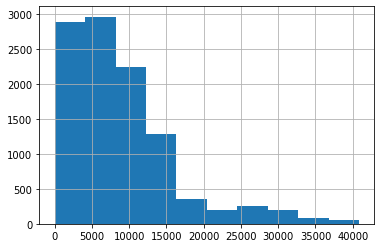

In [24]:
untrd['dist_ciudades'] = untrd.distance(ciudades)
untrd.dist_ciudades.hist()

Calculamos la distancia entre los untrd y los 3 centros urbanos más cercanos

In [25]:
from scipy.spatial import cKDTree

In [26]:
untrd_loc_array = [x.coords[0] for x in untrd.geometry]
ciudades_loc_array = [(638957.71642245480325073, 8776046.08499851264059544),
                         (650821.94210845185443759, 8767628.10137326270341873),
                         (670597.96294799842871726, 8754106.6284990981221199),
                         (669124.46910914790350944, 8744450.91004921309649944),
                         (662145.30887949012685567, 8726179.5864474680274725),
                         (646158.76748905272688717, 8741486.58714986592531204),
                         (635785.37086355045903474, 8731085.4541697483509779),
                         (626452.08753606036771089, 8742547.50271383672952652),
                         (616494.73622976266779006, 8730329.63850652053952217),
                         (632762.1082106635440141, 8721162.77330671437084675),
                         (632290.59018223150633276 ,8753239.86741738766431808),
                         (609186.20678906817920506, 8763398.30729463510215282),
                         (650634.72171482886187732, 8754321.58524731732904911)]

Construimos el árbol de nodos y calculamos las distancias

In [27]:
trd_tree = cKDTree(ciudades_loc_array)
d, i = trd_tree.query(untrd_loc_array, k=3, n_jobs=-1)
mean = [dd.mean() for dd in d]
untrd['Media_3ciudades'] = mean

<AxesSubplot:>

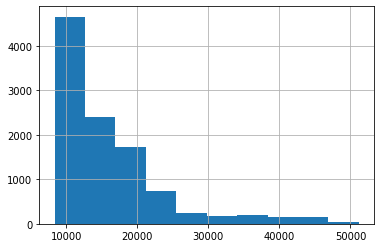

In [28]:
untrd.Media_3ciudades.hist()

Podemos ver que la mayoria de los untrd se ubica en promedio a una distancia menor a los ~12km de un centro urbano

In [29]:
import osmnx as ox

Cargamos el conjunto de polígonos de la zona de trabajo y el mapa de OpenStreetMap con la información correspondiente

In [30]:
conj = gpd.read_file(data_path, driver='FileGDB', layer='CONJ')
dist = conj.to_crs(epsg=4326).dissolve(by='DIST')
G_conj = ox.graph_from_polygon(dist.to_crs(epsg=4326).iloc[0].geometry)
nodes, edges = ox.graph_to_gdfs(G_conj)

In [31]:
mask = (edges.highway.str.contains('trunk').fillna(False) ) #autopistas
mask2 = (edges.highway.str.contains('primary').fillna(False)) #caminos primarios
mask3 = (edges.highway.str.contains('secondary').fillna(False)) #caminos secundarios

Cálculo de distancia de cada untrd a autopistas

In [32]:
main_roads = edges[['geometry','length','name', 'ref']][mask]
main_roads['dist'] = 46
main_roads_comb = main_roads.dissolve(by='dist')
main_roads_comb.to_crs(epsg=31984, inplace= True)
untrd['main_r_dist'] = untrd.distance(main_roads_comb.iloc[0].geometry)

Cálculo de distancia de cada untrd a caminos primarios

In [33]:
sec_roads = edges[['geometry','length','name', 'ref']][mask2]
sec_roads['dist'] = 46
sec_roads_comb = sec_roads.dissolve(by='dist')
sec_roads_comb.to_crs(epsg=31984, inplace= True)
untrd['sec_r_dist'] = untrd.distance(sec_roads_comb.iloc[0].geometry)

Cálculo de distancia de cada untrd a caminos secundarios

In [34]:
ter_roads = edges[['geometry','length','name', 'ref']][mask3]
ter_roads['dist'] = 46
ter_roads_comb = ter_roads.dissolve(by='dist')
ter_roads_comb.to_crs(epsg=31984, inplace= True)
untrd['ter_r_dist'] = untrd.distance(ter_roads_comb.iloc[0].geometry)

In [35]:
untrd.shape

(10504, 146)

<AxesSubplot:ylabel='Frequency'>

<Figure size 1080x432 with 0 Axes>

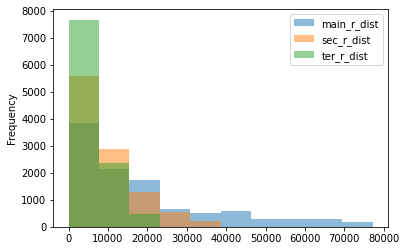

In [36]:
plt.figure(figsize=(15,6))
untrd[['main_r_dist','sec_r_dist','ter_r_dist']].plot.hist(alpha=0.5)

Podemos ver que la mayoría de los untrd se encuentra a menos de 10 km de una autopista, camino principal o secundario

## Generacion de variables con arboles de busqueda

8 - Cree variables que indique la cantidad de consumidores en radios de 25, 50 y 100 metros del transformador.

9 - Cree una variable indicando la distancia media de cada fila a los 5 untrd mas cercanos.

10 - [Opcional] Usando OSMnx descargue los footprints de edificios disponibles, y cree una variable que indique la cantidad de edificios en un radio de 200 metros al transformador.

In [37]:
ucbt = ucbt.to_crs(epsg=31984)
ucbt_loc_array = [x.coords[0] for x in ucbt.geometry]
radio = [25,50,100]
tree = cKDTree(ucbt_loc_array)
near_consumers = [tree.query_ball_point(untrd_loc_array, rr) for rr in radio]
untrd['n_close_con_25'] = [len(c) for c in near_consumers[0]]
untrd['n_close_con_50'] = [len(c) for c in near_consumers[1]]
untrd['n_close_con_100'] = [len(c) for c in near_consumers[2]]

<AxesSubplot:ylabel='Frequency'>

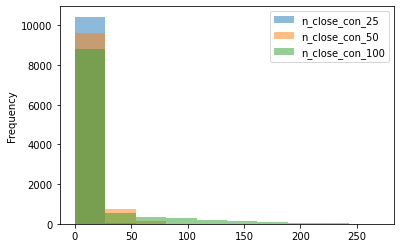

In [38]:
untrd[['n_close_con_25','n_close_con_50','n_close_con_100']].plot.hist(alpha=0.5)

La mayoría de los untrd tiene baja cantidad de clientes cercanos aun cuando el radio de búsqueda crece

Distancia media a los 5 untrd más cercanos

In [39]:
trd_tree = cKDTree(untrd_loc_array)
d, i = trd_tree.query(untrd_loc_array, k=6, n_jobs=-1)
mean = [dd[1:].mean() for dd in d]
untrd['Media_5untrd'] = mean

<AxesSubplot:>

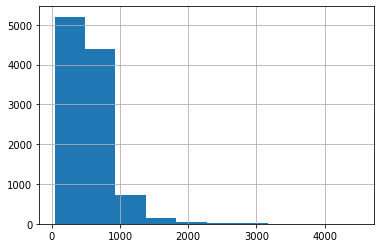

In [40]:
untrd['Media_5untrd'].hist()

Casi todos los untrd tiene a sus 5 vecinos más cercanos, en promedio, en un radio menor a 1 km

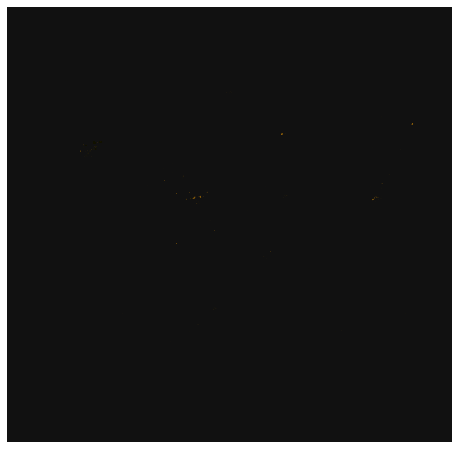

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [41]:
F = ox.footprints.footprints_from_polygon(dist.to_crs(epsg=4326).iloc[0].geometry, footprint_type = 'building')
ox.plot_footprints(F)

In [42]:
F.to_crs(epsg=31984, inplace= True)
untrd['dist_buildings'] = untrd.distance(F.iloc[0].geometry)

/home/andres/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Generacion de grafos y calculo de rutas

11 - Usando las tecnicas mostradas en el notebook sobre procesamiento de informacion georeferenciada, construya un grafo basado en la capa de linea de distribicion de media tension:
  - Utilize los puntos de conexion PCON_1 y PCON_2 como nodos, y los segmentos como edges.
  - Adicione COMP y COD_ID como atributos de edge (aristas)
  - Asocie cada transformador untrd con un nodo
  - Asocie cada punto de conexion los circuitos de media tension (CTMT) con la subestacion, a un nodo.

12 - Seleccione al menos 5 metricas de grafo, calcule sus valores para los nodos asociados a cada fila y adicionelos como features al dataset.

13 - [Opcional] Cree convinaciones entre las metricas generando variables adicionales.

14 - Calcule la distancia de cada untrd a su correspondiente punto de conexion con la subestacion, ponderando por COMP (longitud de segmento), utilize el parametro "method" para calcular diferentes tipos de distancias.
Adicione los resultados como variables del dataset.

15 - Calcule la ruta (secuencia de nodos) hasta la conexion con la subestacion, y en base a esta calcule:
 - Resistencia electica total de cada conexion
 - Reactancia electrica de cada conexion.
 [Opcional]
 - Modulo y Angulo de la Impedancia.
 - Corriente Nonimal media a lo largo de la ruta
 - Corriente Maxima media del conductor a lo largo la ruta

In [43]:
import networkx as nx

Generamos un grafo basado en la red de distribución, y agregamos la variable "COD_ID" de cada segmento como atributo de Edge:

In [44]:
SG = nx.Graph()
SG.add_weighted_edges_from(ssmt[['PN_CON_1','PN_CON_2','COMP']].values.tolist(), weight='length')

ID_attr_dict = {tuple((x[0], x[1])): x[2] for x in ssmt[['PN_CON_1','PN_CON_2','COD_ID']].values}
nx.set_edge_attributes(SG, ID_attr_dict, 'SEG_ID')

Leemos PONNOT y extraemos las coordenadas de cada punto notable. Luego procedemos a armar el árbol con las coordenadas de PONNOT y buscamos el untrd más cercano a cada par de coordenadas:

In [45]:
ponnot = gpd.read_file(data_path, driver='FileGDB', layer='PONNOT')
ponnot = ponnot.to_crs(epsg=31984)
ponnot_loc_array = [x.coords[0] for x in ponnot.geometry]


pn_tree = cKDTree(ponnot_loc_array)
pnd, pni = pn_tree.query(untrd_loc_array, n_jobs=-1)
untrd['NODE'] = [ponnot.iloc[i].COD_ID for i in pni]

Asociamos cada nodo a un punto de conexión de los circuitos de media tensión con la subestación (datos extraídos a mano):

In [46]:
ctmt_endpoints = pd.read_csv('data/endpoints_utf.csv')
ep_dict = {row.CTMT: str(row.PONNOT) for i,row in ctmt_endpoints.iterrows()}
untrd['ENDNODE'] = untrd.CTMT.map(ep_dict)

In [47]:
untrd[untrd.NODE.isna()]

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,...,main_r_dist,sec_r_dist,ter_r_dist,n_close_con_25,n_close_con_50,n_close_con_100,Media_5untrd,dist_buildings,NODE,ENDNODE


In [48]:
untrd[untrd.ENDNODE.isna()]

/home/andres/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,...,main_r_dist,sec_r_dist,ter_r_dist,n_close_con_25,n_close_con_50,n_close_con_100,Media_5untrd,dist_buildings,NODE,ENDNODE


In [49]:
untrd.shape

/home/andres/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10504, 153)

Calculamos seis (6) métricas del grafo:

In [50]:
print('calculando degree')
g_degree = SG.degree(untrd.NODE)

print('calculando neighbor degree')
g_avg_ndeg = nx.average_neighbor_degree(SG)

print('calculando closeness centrality')
#g_bet_cen = nx.betweenness_centrality(SG)

print('calculando pagerank')
g_pr = nx.pagerank(SG)

print('calculando eigenvector centrality')
g_evc = nx.eigenvector_centrality(SG)

print('calculando clustering')
g_clus = nx.clustering(SG)

calculando degree
calculando neighbor degree
calculando closeness centrality
calculando pagerank
calculando eigenvector centrality
calculando clustering


Adicionamos esta información al gráfico como atributo de los nodos:

In [51]:
nx.set_node_attributes(SG, g_degree, 'degree')
nx.set_node_attributes(SG, g_avg_ndeg, 'avg_nei_degree')
#nx.set_node_attributes(SG, betweenness, 'betweenness')
nx.set_node_attributes(SG, g_pr, 'pagerank')
nx.set_node_attributes(SG, g_evc, 'eigenvec')
nx.set_node_attributes(SG, g_clus, 'clustering')

Agregamos los valores al dataframe de transformadores

In [52]:
untrd['g_degree'] = untrd.NODE.map(g_degree)
untrd['g_avg_ndeg'] = untrd.NODE.map(g_avg_ndeg)
#untrd['g_betweenness'] = untrd.NODE.map(g_bet_cen)
untrd['g_pagerank'] = untrd.NODE.map(g_pr)
untrd['g_eigenvec'] = untrd.NODE.map(g_evc)
untrd['g_clustering'] = untrd.NODE.map(g_clus)

<AxesSubplot:ylabel='Frequency'>

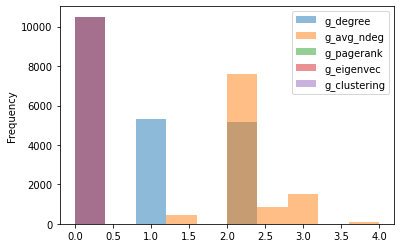

In [53]:
grafo = untrd[['g_degree','g_avg_ndeg','g_pagerank','g_eigenvec','g_clustering']]
grafo.plot.hist(alpha=0.5)

:/

Calculamos la distancia de cada untrd a su correspondiente untrs:

In [54]:
untrd['dist_to_trs'] = [nx.shortest_path_length(SG, trd.NODE, trd.ENDNODE, weight='length') for i, trd in untrd.iterrows()]

<AxesSubplot:>

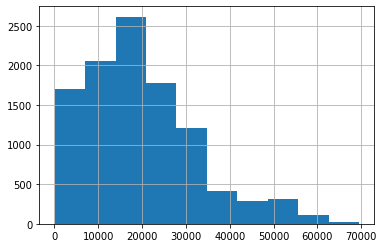

In [55]:
untrd['dist_to_trs'].hist()

La distancia, a través de las líneas de trasmisión, de los untrd a sus respectivos untrs muestra una distribución parecida a una Poisson con un pico alrededor de los 17km

Obtenemos los nodos que se encuentran en el camino entre cada untrd y su untrs más cercana, utilizando el método de Dijkstra.

También obtenemos las aristas entre cada untrd y su untrs más cercana:

In [56]:
untrd_node_paths_dijkstra = [nx.shortest_path(SG, trd.NODE, trd.ENDNODE, method = 'dijkstra') for i, trd in untrd.iterrows()]

untrd_seg_paths_dijkstra = [[SG.edges[path[i-1:i+1]]['SEG_ID'] for i in range(1,len(path))] for path in untrd_node_paths_dijkstra]

Utilizando el método de Bellman-Ford los valores obtenidos son los mismos que con Dijkstra por lo que decidimos descartarlos del dataset.

In [57]:
#untrd_node_paths_bf = [nx.shortest_path(SG, trd.NODE, trd.ENDNODE, method = 'bellman-ford') for i, trd in untrd.iterrows()]
#untrd_seg_paths_bf = [[SG.edges[path[i-1:i+1]]['SEG_ID'] for i in range(1,len(path))] for path in untrd_node_paths_bf]

Cargamos la base de datos con la información de cada segmento conductor:

In [58]:
cond = gpd.read_file(data_path, driver='FileGDB', layer='SEGCON')
cond.set_index('COD_ID', inplace=True)

Agregamos a la base de datos de las líneas de transmisión la información sobre la resistencia R y reactancia X de cada segmento:


In [59]:
segcon.set_index('COD_ID', inplace=True)
con = segcon[['R1','X1','CNOM','CMAX']]
ssmt = ssmt.join(con, on='TIP_CND', how = 'left')
ssmt['R'] = ssmt.R1 * ssmt.COMP / 1000
ssmt['X'] = ssmt.X1 * ssmt.COMP / 1000

In [60]:
ssmt.set_index('COD_ID', inplace=True)

In [61]:
untrd_ele = pd.DataFrame([ssmt[['COMP','R','X','CNOM','CMAX']].loc[r].sum().to_list() for r in untrd_seg_paths_dijkstra], 
                         index=untrd.index, columns=['COMP','R','X','CNOM','CMAX'])

In [62]:
untrd_ele['CNOM'] = untrd_ele['CNOM'] / untrd_ele['COMP']
untrd_ele['CMAX'] = untrd_ele['CMAX'] / untrd_ele['COMP']

In [63]:
untrd[['COMP','R','X','CNOM','CMAX']] = untrd_ele
#untrd[['COMP_bf','R_bf','X_bf','CNOM_bf','CMAX_bf']] = untrd_ele_bf

<AxesSubplot:>

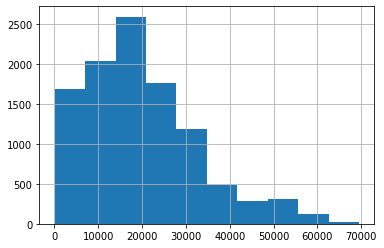

In [64]:
untrd['COMP'].hist()

La distribución de COMP es la misma que las distancias a los untrs ya que las variables son iguales

<AxesSubplot:ylabel='Frequency'>

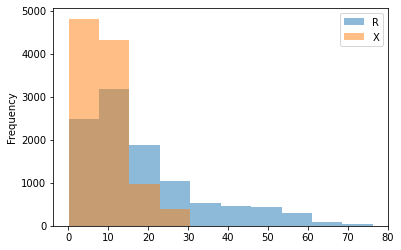

In [65]:
untrd[['R','X']].plot.hist(alpha=0.5)

La reactancia X presenta una distribución más concentrada que la recistencia R alrededor de 10 ohms, R presenta un pico en ~17 ohms

<AxesSubplot:ylabel='Frequency'>

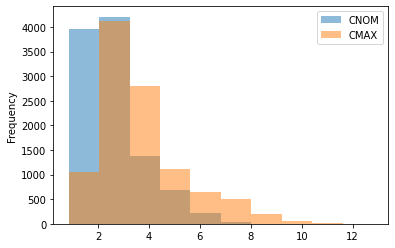

In [66]:
untrd[['CNOM','CMAX']].plot.hist(alpha=0.5)

Vemos que la distribución de CNOM presenta una concentración de valores menores o iguales a 3A, mientras que la corriente máxima CMAX se ubica alrededor de 4A, por lo cual podemos decir que el sistema es seguro

In [67]:
imp = pd.DataFrame({'z_mod' : (untrd_ele.X**2+untrd_ele.R**2).apply(np.sqrt),
          'z_ang' : (untrd_ele.X/untrd_ele.R).apply(np.arctan)})

In [68]:
untrd[['z_mod','z_ang']] = imp
#untrd[['z_mod_bf','z_angbf']] = imp_bf

array([[<AxesSubplot:title={'center':'z_mod'}>,
        <AxesSubplot:title={'center':'z_ang'}>]], dtype=object)

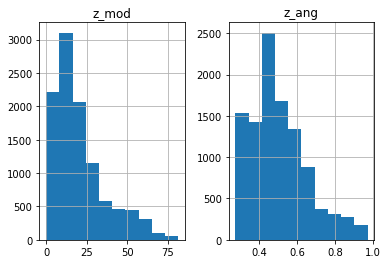

In [69]:
untrd[['z_mod','z_ang']].hist()

Vemos que la distribución del ángulo de la impedancia es alrededor de valores bajos ~0.5°

In [70]:
untrd.head()

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,...,g_eigenvec,g_clustering,dist_to_trs,COMP,R,X,CNOM,CMAX,z_mod,z_ang
0,4_1040341,46,452971,ET4_1040341,0,ABC,ABCN,0,AT,38,...,5.680527e-06,0.0,8170.23,8170.23,10.595753,3.850102,1.436459,2.052084,11.273564,0.348529
1,4_1040306,46,452681,ET4_1040306,0,ABC,ABCN,0,AT,38,...,2.625699e-06,0.0,10274.81,10274.81,13.859956,4.858406,1.280666,1.829523,14.686814,0.337152
2,4_1040035,46,462831,ET4_1040035,ET4_1040035,AB,AN,BN,AT,38,...,4.072908e-07,0.0,15507.34,15507.34,11.510700,6.914966,2.466445,3.523493,13.428066,0.540965
3,4_1040036,46,465251,ET4_1040036,ET4_1040036,AB,AN,BN,AT,38,...,7.984421e-07,0.0,18841.79,18841.79,10.493560,8.267169,2.344369,3.349098,13.358925,0.667278
4,4_1040038,46,464061,ET4_1040038,ET4_1040038,AB,AN,BN,AT,38,...,3.746185e-07,0.0,20346.48,20346.48,12.827334,8.988066,2.293335,3.276193,15.662880,0.611193


In [71]:
#untrd.to_csv('untrd.csv', index=False)  

/home/andres/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
